In [5]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy_financial as npf
%matplotlib inline

In [28]:
price = pdr.get_data_yahoo('HARVIA.HE', start = '2013-01-01')

price.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-03-22,5.120,5.00,5.100,5.00,3165965.0,4.421191
2018-03-23,5.040,5.00,5.040,5.03,70366.0,4.447718
2018-03-26,5.098,5.01,5.098,5.04,15052.0,4.456561
2018-03-27,5.400,5.04,5.050,5.39,55069.0,4.766044
2018-03-28,5.400,5.15,5.400,5.30,12995.0,4.686463


In [32]:
price.drop(columns='Adj Close', axis = 1)
price = round(price,2)
price.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-03-22,5.12,5.00,5.10,5.00,3165965.0,4.42
2018-03-23,5.04,5.00,5.04,5.03,70366.0,4.45
2018-03-26,5.10,5.01,5.10,5.04,15052.0,4.46
2018-03-27,5.40,5.04,5.05,5.39,55069.0,4.77
2018-03-28,5.40,5.15,5.40,5.30,12995.0,4.69


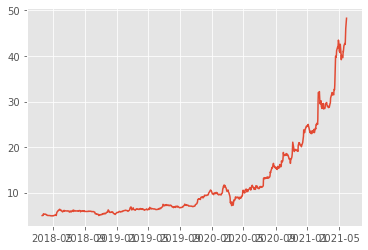

In [33]:
with plt.style.context('ggplot'):
    plt.plot(price['Close'])

In [36]:
# monthly sample
price.index = pd.DatetimeIndex(price.index)
price_monthly = price.resample('BM').last() #the last business day of month
price_monthly.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-03-30,5.38,5.29,5.38,5.30,7364.0,4.69
2018-04-30,4.95,4.92,4.95,4.94,3191.0,4.37
2018-05-31,6.22,6.15,6.20,6.17,34886.0,5.46
2018-06-29,6.14,6.00,6.14,6.00,757.0,5.31
2018-07-31,6.00,5.97,5.97,6.00,133.0,5.31


(array([17652., 17775., 17897., 18017., 18140., 18262., 18383., 18506.,
        18628., 18748.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

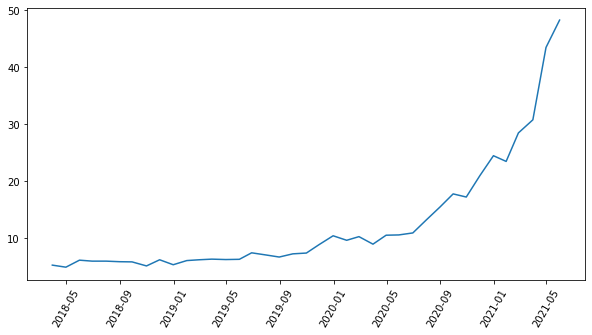

In [47]:
plt.figure(figsize=(10,5))
plt.plot(price_monthly['Close'])
plt.xticks(rotation=60)

# Moving Average

In [51]:
price['5-day']=price['Close'].rolling(5).mean().shift()
price.head(10)


,High,Low,Open,Close,Volume,Adj Close,5-day
Date,,,,,,,
2018-03-22,5.12,5.00,5.10,5.00,3165965.0,4.42,NaN
2018-03-23,5.04,5.00,5.04,5.03,70366.0,4.45,NaN
2018-03-26,5.10,5.01,5.10,5.04,15052.0,4.46,NaN
2018-03-27,5.40,5.04,5.05,5.39,55069.0,4.77,NaN
2018-03-28,5.40,5.15,5.40,5.30,12995.0,4.69,NaN
2018-03-29,5.38,5.29,5.38,5.30,7364.0,4.69,5.152
2018-04-03,5.31,5.25,5.31,5.30,4410.0,4.69,5.212
2018-04-04,5.39,5.25,5.38,5.30,20600.0,4.69,5.266
2018-04-05,5.30,5.21,5.29,5.22,7665.0,4.62,5.318


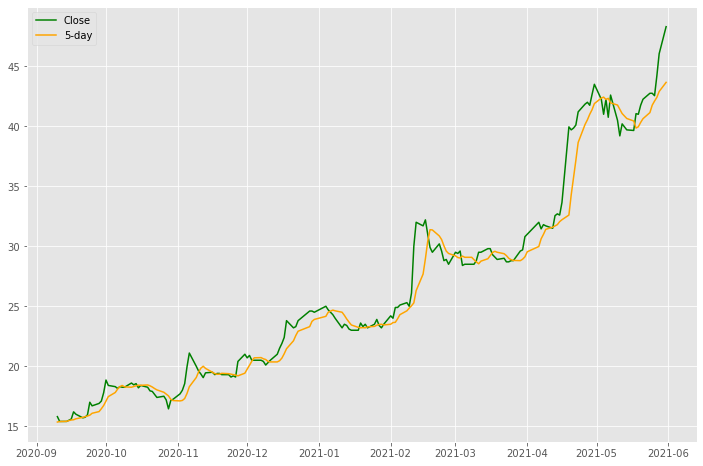

In [80]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(12,8))
    plt.plot(price['Close'][-180:],label='Close',color='green')
    plt.plot(price['5-day'][-180:],label='5-day',color = 'orange')
    plt.legend(loc=2)
   

In [83]:
# Mean absolute deviation
price['MAD']=np.abs(price['Close']-price['5-day'])
price['MAD'].head(10)

Date
2018-03-22      NaN
2018-03-23      NaN
2018-03-26      NaN
2018-03-27      NaN
2018-03-28      NaN
2018-03-29    0.148
2018-04-03    0.088
2018-04-04    0.034
2018-04-05    0.098
2018-04-06    0.044
Name: MAD, dtype: float64

In [84]:
price['MAD'].mean()

0.3458358585858586

In [86]:
# Mean absolute percentage error
price['MAPE']= price['MAD']/price['Close']
price['MAPE'].head(10)

Date
2018-03-22         NaN
2018-03-23         NaN
2018-03-26         NaN
2018-03-27         NaN
2018-03-28         NaN
2018-03-29    0.027925
2018-04-03    0.016604
2018-04-04    0.006415
2018-04-05    0.018774
2018-04-06    0.008397
Name: MAPE, dtype: float64

In [88]:
price['MAPE'].mean()

0.024092473924989567

In [89]:
# Mean square error
price['MSE']=price['MAD']**2
price['MSE'].head(10)

Date
2018-03-22         NaN
2018-03-23         NaN
2018-03-26         NaN
2018-03-27         NaN
2018-03-28         NaN
2018-03-29    0.021904
2018-04-03    0.007744
2018-04-04    0.001156
2018-04-05    0.009604
2018-04-06    0.001936
Name: MSE, dtype: float64

In [92]:
MSE=price['MSE'].mean()
MSE

0.5216072676767678

In [94]:
# Root mean squre error
RMSE = np.sqrt(MSE)
RMSE

0.7222238348855345

In [95]:
## Note: based on Moving average forecast, when closing price is higher than the predicted price, signal to sell and vice versa. 